In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**bold text**## Loading the dataset

In [5]:
data = pd.read_csv('/content/drive/MyDrive/datasets/modified_data (3).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Data Preprocessing

italicised text### Sorting out missing Data

In [7]:
#The Id column may not be all too relevant, hence dropping it.
data.drop('Id', axis=1, inplace=True)

In [8]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Checking for missing data in the columns

In [9]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [10]:
# Using percentage values
100* data.isnull().sum()/len(data)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 76, dtype: float64

**Looking more into the features**

In [11]:
feats = list(data.columns)
len(feats)

76

In [12]:
features_with_missing_data = list(data.columns[data.isna().any()])
len(features_with_missing_data)

15

In [13]:
for i in features_with_missing_data:
    print(i, ' ', 100* data[i].isnull().sum()/len(data))

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [14]:
# Dropping features with more than 50% missing data
data.dropna(axis=1, thresh=0.5 * (len(data)), inplace=True)

We will use some strategies to fill in empty values. For the numerical data, mean fill will come in handy. forward filling and backward filling will be used.

In [15]:
mean_fill=['LotFrontage', 'MasVnrArea']
bfill_data = ['FireplaceQu']
ffill_data = list(set(features_with_missing_data)-set(mean_fill)-set(bfill_data))

In [16]:
ffill_data

['GarageQual',
 'BsmtExposure',
 'MasVnrType',
 'GarageFinish',
 'BsmtFinType2',
 'GarageCond',
 'Electrical',
 'GarageType',
 'BsmtCond',
 'GarageYrBlt',
 'BsmtQual',
 'BsmtFinType1']

In [17]:
for i in mean_fill:
    data[i].fillna(data[i].mean(), inplace=True)

In [18]:
for j in bfill_data:
    data[j].fillna(method = 'bfill', inplace=True)

In [19]:
for k in ffill_data:
    data[k].fillna(method = 'ffill', inplace=True)

In [20]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

### Encoding the Dataset
- This will ensure the model does not put weights to what need not weighting.

**List all non-numeric columns**

**Extract Categorical Data**

In [60]:
categorical_features = list(data.select_dtypes(include=['object']).copy().columns)

In [64]:
initial_features =list(data.columns)

In [61]:
categorical_features[:5]

['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'RoofStyle']

In [65]:
nom_data=['MSZoning', 'LandContour', 'LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtFinType1','CentralAir']
ord_data = list(set(categorical_features)-set(nom_data))
num_data = list(set(initial_features)-set(categorical_features))
target = ['SalePrice']

In [109]:
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


Encoding ordinal data

In [46]:
for i in ord_data:
    data[i] = (data[i].astype('category')).cat.codes

In [67]:
df_ord = data[ord_data]

**Implementing One Hot Encoding**
This is for the norminal data

In [68]:
df_nom = pd.get_dummies(data[nom_data])

Putting the data back together

In [69]:
df_num = data[num_data]

In [70]:
joined_data = pd.concat([df_num, df_nom, df_ord], axis=1)

In [71]:
joined_data.head()

,Utilities,PoolArea,SaleCondition,MiscVal,BsmtExposure,3SsnPorch,OverallCond,Condition2,SaleType,GarageType,...,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,CentralAir_N,CentralAir_Y
0,0,0,4,0,3,0,5,2,8,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,4,0,1,0,8,2,8,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,4,0,2,0,5,2,8,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,3,0,5,2,8,5,...,0,0,1,0,0,0,0,0,0,1
4,0,0,4,0,0,0,5,2,8,1,...,0,0,0,0,1,0,0,0,0,1


### Standardize the dataset

In [84]:
scaler = StandardScaler()

In [85]:
df_X = joined_data.drop('SalePrice', axis=1)
X = np.array(df_X)

In [86]:
df_y = data[target]
y = np.array(df_y)

In [87]:
X.shape

(1460, 162)

In [88]:
y.shape

(1460, 1)

In [89]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

### Feature Selection using L1

In [90]:
regressor = LassoCV()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

L1 selected only  77  features out of  162  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

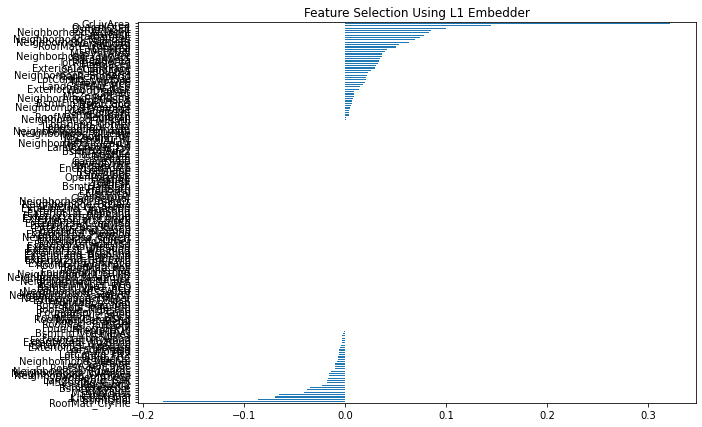

In [91]:
#print(regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=df_X.columns)

#print(coef_col)
sorted_coef = coef_col.sort_values()
plt.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

**Retrieve the selected features**

In [92]:
selected_features_list = []
for label, value in zip(coef_col.index, coef_col.values):
    if value != 0:
        selected_features_list.append(label)

selected_features_list

['Utilities',
 'PoolArea',
 'SaleCondition',
 'BsmtExposure',
 'OverallCond',
 'Condition2',
 'SaleType',
 'YearBuilt',
 'ExterQual',
 'LowQualFinSF',
 'Fireplaces',
 'BedroomAbvGr',
 'FullBath',
 'GarageCond',
 'WoodDeckSF',
 'Street',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'GarageFinish',
 'MasVnrArea',
 'GarageCars',
 'MoSold',
 'OverallQual',
 'LotArea',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BldgType',
 'BsmtFinSF2',
 'BsmtQual',
 'GarageArea',
 'GrLivArea',
 'BsmtCond',
 'KitchenQual',
 'ScreenPorch',
 'LotFrontage',
 'Functional',
 'HeatingQC',
 'YrSold',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'MasVnrType',
 'MSSubClass',
 'BsmtFullBath',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 '

In [93]:
standardized_df = pd.DataFrame(X, columns=df_X.columns)

In [95]:
X = standardized_df[selected_features_list]
X

,Utilities,PoolArea,SaleCondition,BsmtExposure,OverallCond,Condition2,SaleType,YearBuilt,ExterQual,LowQualFinSF,...,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_Plywood,Exterior2nd_ImStucc,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_Wood,BsmtFinType1_GLQ,BsmtFinType1_LwQ
0,-0.02618,-0.068692,0.208502,0.638078,-0.517200,-0.03174,0.313867,1.050994,-0.777976,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,-0.163471,-0.333333,-0.045376,1.552809,-0.232705
1,-0.02618,-0.068692,0.208502,-1.109753,2.179628,-0.03174,0.313867,0.156734,0.663451,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,-0.163471,-0.333333,-0.045376,-0.643994,-0.232705
2,-0.02618,-0.068692,0.208502,-0.235838,-0.517200,-0.03174,0.313867,0.984752,-0.777976,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,-0.163471,-0.333333,-0.045376,1.552809,-0.232705
3,-0.02618,-0.068692,-3.426284,0.638078,-0.517200,-0.03174,0.313867,-1.863632,0.663451,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,6.117275,3.000000,-0.045376,-0.643994,-0.232705
4,-0.02618,-0.068692,0.208502,-1.983669,-0.517200,-0.03174,0.313867,0.951632,-0.777976,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,-0.163471,-0.333333,-0.045376,1.552809,-0.232705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.02618,-0.068692,0.208502,0.638078,-0.517200,-0.03174,0.313867,0.918511,0.663451,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,-0.163471,-0.333333,-0.045376,-0.643994,-0.232705
1456,-0.02618,-0.068692,0.208502,0.638078,0.381743,-0.03174,0.313867,0.222975,0.663451,-0.120242,...,-0.188311,-0.423464,-0.02618,3.538152,-0.083045,-0.163471,-0.333333,-0.045376,-0.643994,-0.232705
1457,-0.02618,-0.068692,0.208502,0.638078,3.078570,-0.03174,0.313867,-1.002492,-3.660830,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,-0.163471,-0.333333,-0.045376,1.552809,-0.232705
1458,-0.02618,-0.068692,0.208502,-0.235838,0.381743,-0.03174,0.313867,-0.704406,0.663451,-0.120242,...,-0.188311,-0.423464,-0.02618,-0.282633,-0.083045,-0.163471,-0.333333,-0.045376,1.552809,-0.232705


## Split the Dataset

In [96]:
y = pd.DataFrame(y, columns = df_y.columns)
y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [98]:
X_train.shape

(1022, 77)

## Train the Model

**Build the sequential model to be trained on the data**

In [99]:
model = Sequential()

In [100]:
# input layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# compile model
model.compile(loss='mse', optimizer='adam')

**Fit the model to the training data**

In [101]:
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs = 100,
         batch_size=256
         )

Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 1.4302 - val_loss: 1.2473
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.2852 - val_loss: 1.1159
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1701 - val_loss: 0.9974
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0370 - val_loss: 0.8957
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9426 - val_loss: 0.8093
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8666 - val_loss: 0.7413
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8083 - val_loss: 0.6902
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7405 - val_loss: 0.6542
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7233 - val_loss: 0.6288
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6962 - val_loss: 0.6112
Epoch 11/100
4/4 [=

## Evaluate Model Performance

In [102]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,1.430210,1.247268
1,1.285236,1.115900
2,1.170112,0.997365
3,1.037037,0.895693
4,0.942587,0.809316
...,...,...
95,0.585301,0.552458
96,0.588316,0.552317
97,0.585059,0.552327
98,0.587315,0.552409


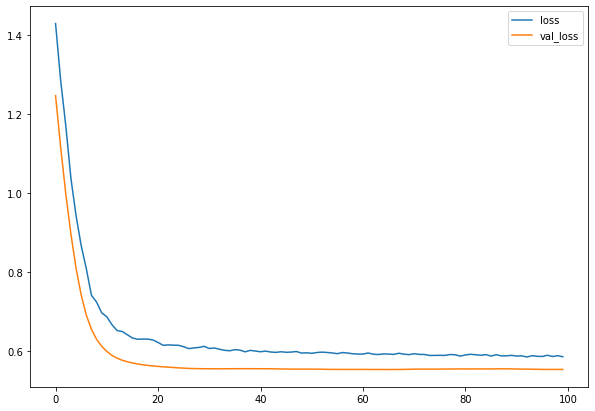

In [103]:
losses.plot()

In [104]:
y_hat = model.predict(X_test)

In [105]:
mean_absolute_error(y_test,y_hat)

0.5526408790569426

In [106]:
mean_squared_error(y_test, y_hat)

0.552340839241403

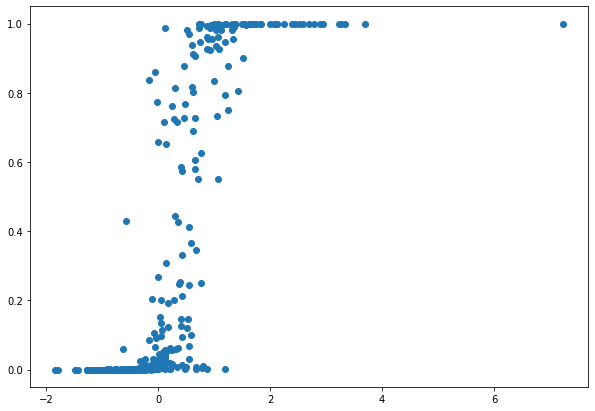

In [107]:
# Predicted values vs Actual Values
plt.scatter(y_test, y_hat)